In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

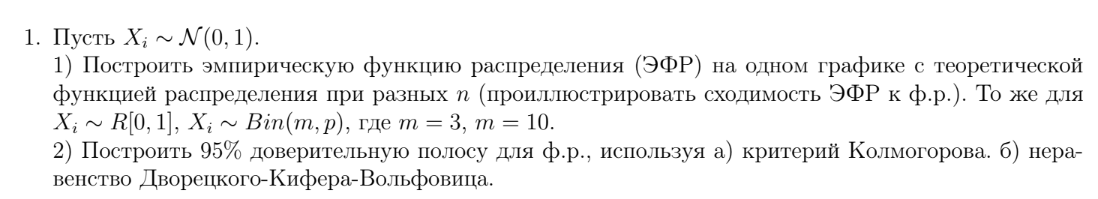

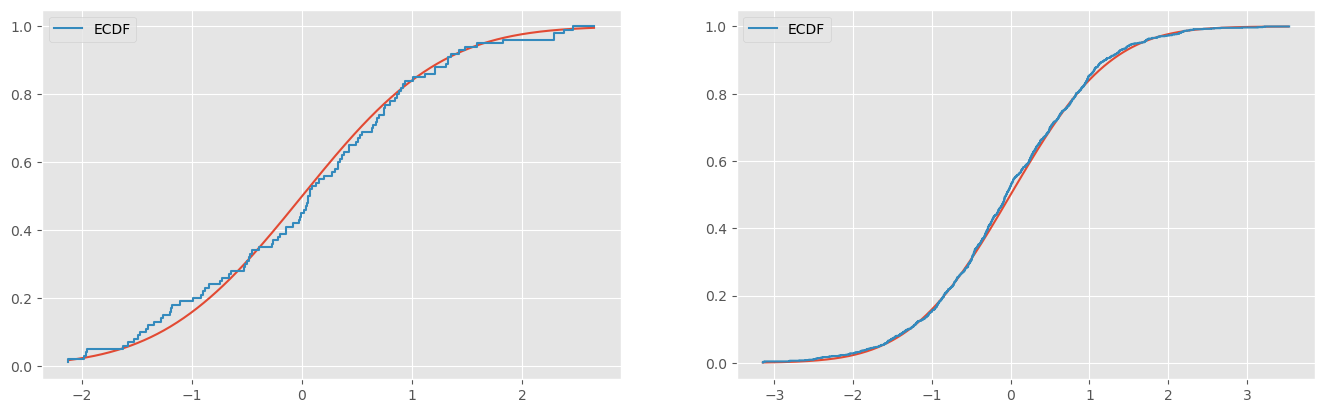

In [25]:
N = [100, 1000]
plt.subplots_adjust(left = 0.01, right = 2)

for i in range(2):
    plt.subplot(1, 2, i+1)
    sample = sc.stats.norm.rvs(0, 1, size=N[i])
    x = np.arange(min(sample), max(sample), 0.01)
    ecdf = ECDF(sample)
    plt.plot(x, sc.stats.norm.cdf(x, 0, 1))
    plt.step(ecdf.x, ecdf.y, label="ECDF")
    plt.legend(loc="upper left")

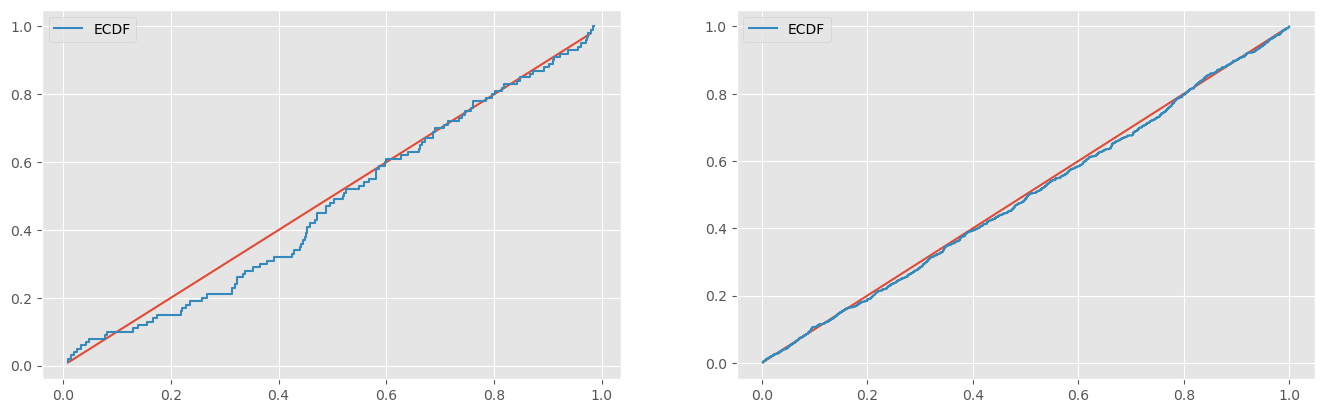

In [26]:
N = [100, 1000]
plt.subplots_adjust(left = 0.01, right = 2)

for i in range(2):
    plt.subplot(1, 2, i+1)
    sample = sc.stats.uniform.rvs(0, 1, size=N[i])
    x = np.arange(min(sample), max(sample), 0.01)
    ecdf = ECDF(sample)
    plt.plot(x, sc.stats.uniform.cdf(x, 0, 1))
    plt.step(ecdf.x, ecdf.y, label="ECDF")
    plt.legend(loc="upper left")

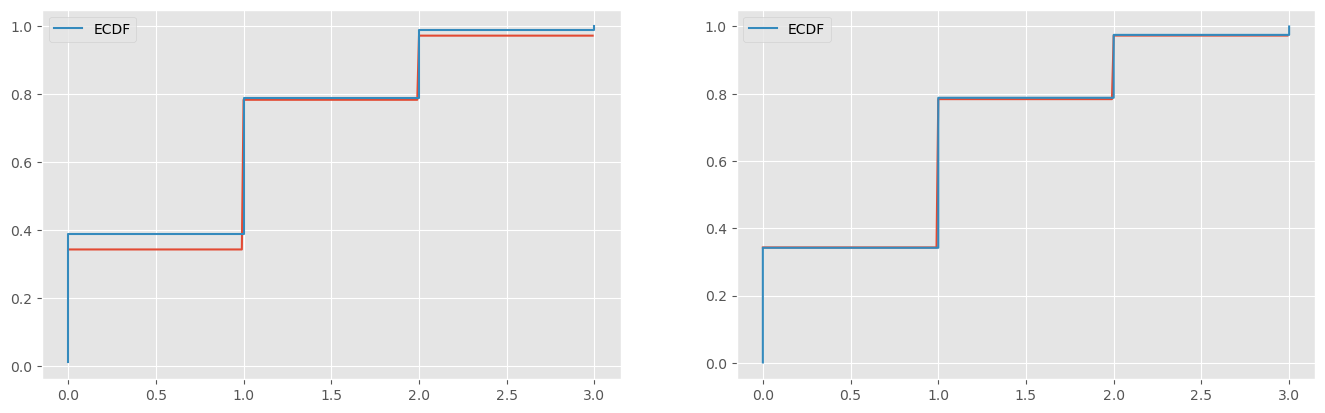

In [23]:
N = [100, 1000]
plt.subplots_adjust(left = 0.01, right = 2)
p = 0.3
m = 3

for i in range(2):
    plt.subplot(1, 2, i+1)
    sample = sc.stats.binom.rvs(m, p, size=N[i])
    x = np.arange(min(sample), max(sample), 0.01)
    ecdf = ECDF(sample)
    plt.plot(x, sc.stats.binom.cdf(x, m, p))
    plt.step(ecdf.x, ecdf.y, label="ECDF")
    plt.legend(loc="upper left")

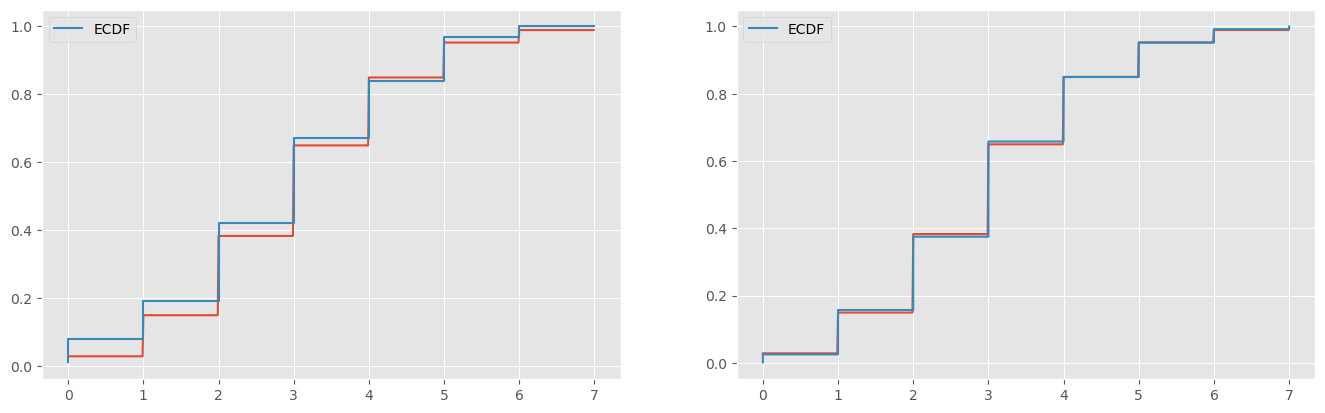

In [24]:
N = [100, 1000]
plt.subplots_adjust(left = 0.01, right = 2)
p = 0.3
m = 10

for i in range(2):
    plt.subplot(1, 2, i+1)
    sample = sc.stats.binom.rvs(m, p, size=N[i])
    x = np.arange(min(sample), max(sample), 0.01)
    ecdf = ECDF(sample)
    plt.plot(x, sc.stats.binom.cdf(x, m, p))
    plt.step(ecdf.x, ecdf.y, label="ECDF")
    plt.legend(loc="upper left")

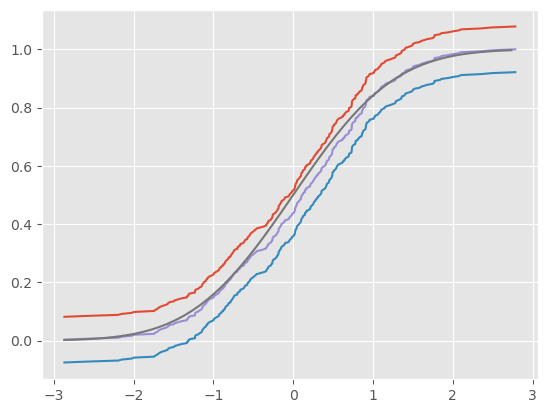

In [4]:
#2) a) 
n = 300
sample = sc.stats.norm.rvs(0, 1, size=n)
k = sc.special.kolmogi(0.05)
ecdf = ECDF(sample)


plt.plot(ecdf.x, [i + k/n**0.5 for i in ecdf.y])
plt.plot(ecdf.x, [i - k/n**0.5 for i in ecdf.y])
plt.plot(ecdf.x, ecdf.y)
x = np.arange(min(sample), max(sample), 0.1)

plt.plot(x, sc.stats.norm.cdf(x,0,1))

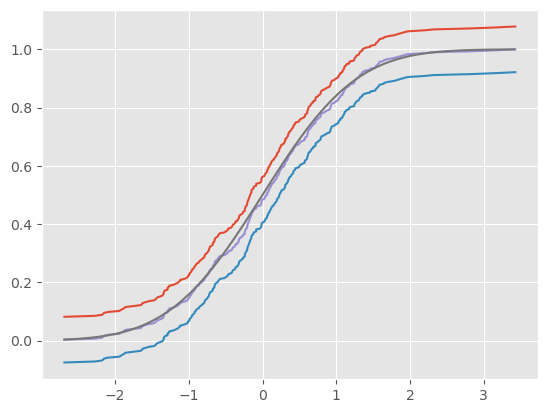

In [3]:
#2) Нер-во Дворецкого
n = 300
sample = sc.stats.norm.rvs(0, 1, size=n)
ecdf = ECDF(sample)

a = 0.05
c = (np.log(1/40)/(-2*n))**0.5

plt.plot(ecdf.x, [i + c for i in ecdf.y])
plt.plot(ecdf.x, [i - c for i in ecdf.y])
plt.plot(ecdf.x, ecdf.y)
x = np.arange(min(sample), max(sample), 0.1)

plt.plot(x, sc.stats.norm.cdf(x,0,1))

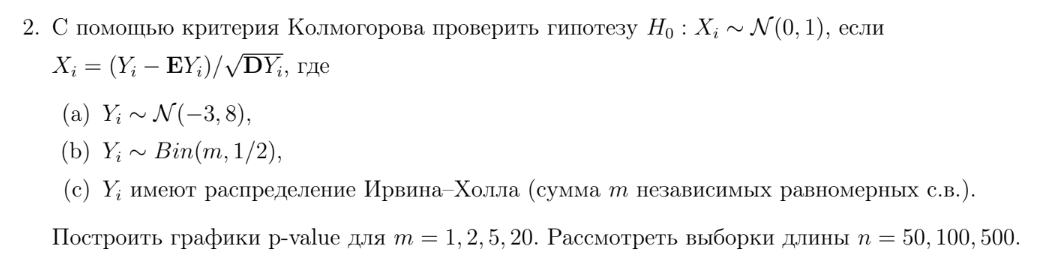

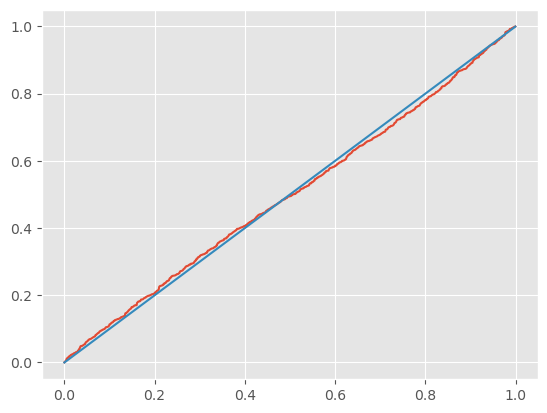

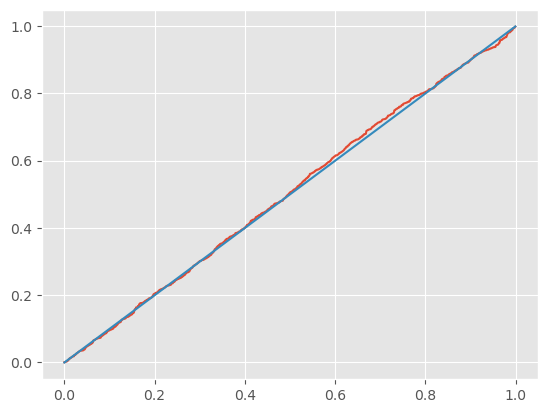

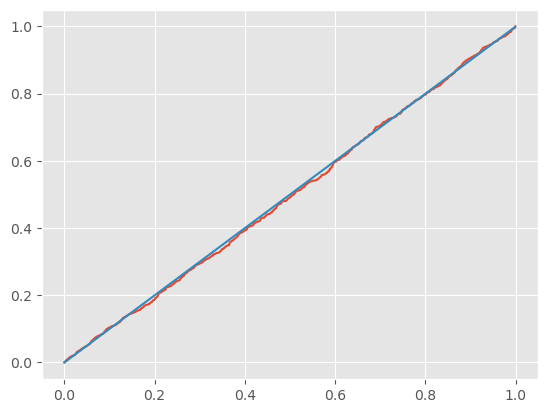

In [67]:
#a) H0: Xi ~ N(0, 1)
N = [50, 100, 500]

for n in N:
    p = []
    for i in range(1000):
        y = sc.stats.norm.rvs(-3, 8**0.5, size=n)
        x = (y + 3)/(8**0.5)   
        p.append(sc.stats.kstest(x, 'norm')[1])
        
    p.sort()
    x = np.arange(0, 1, 0.001)
    plt.plot(x, p)
    plt.plot(x, x)
    plt.show()

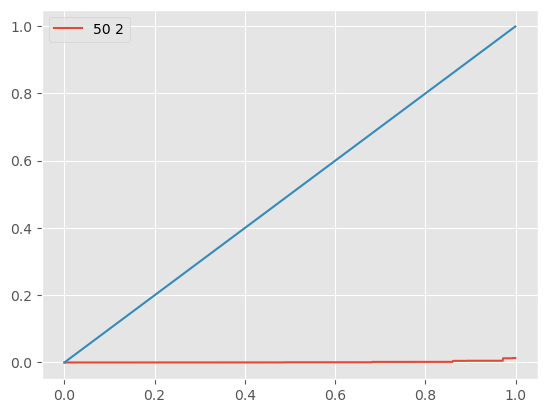

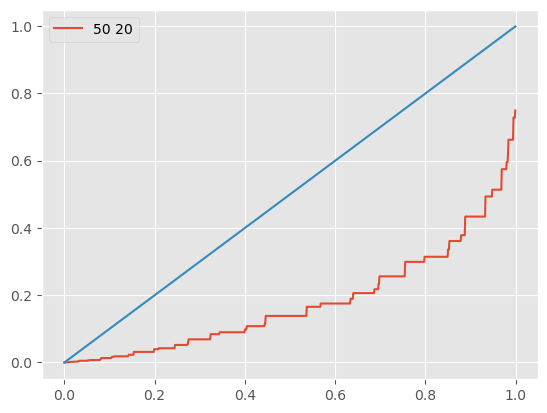

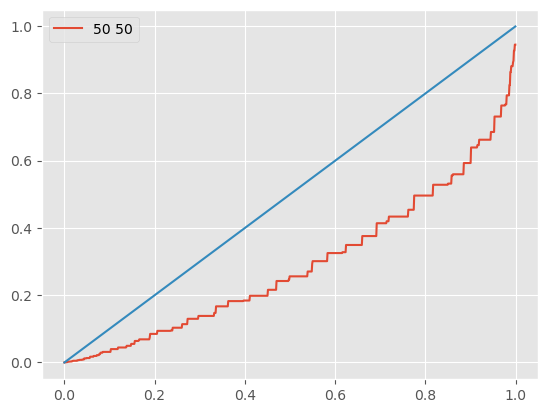

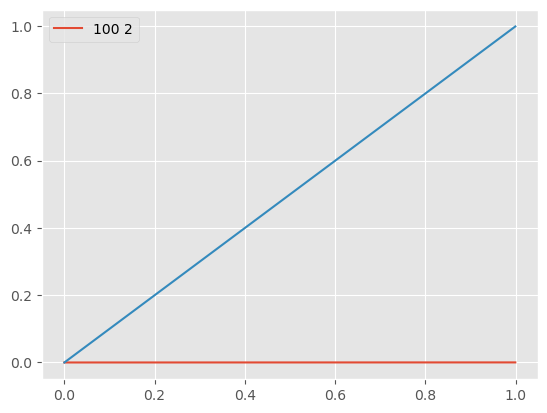

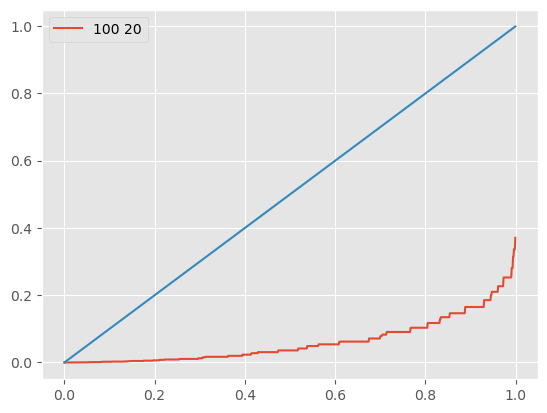

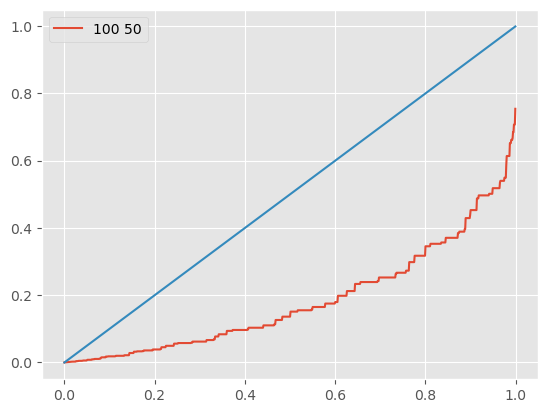

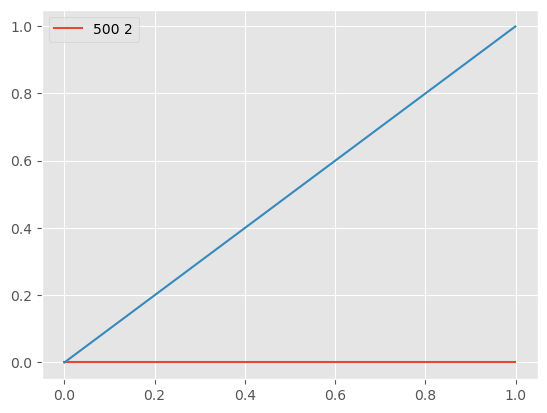

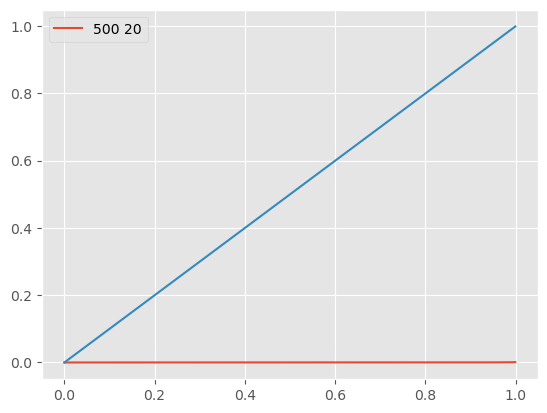

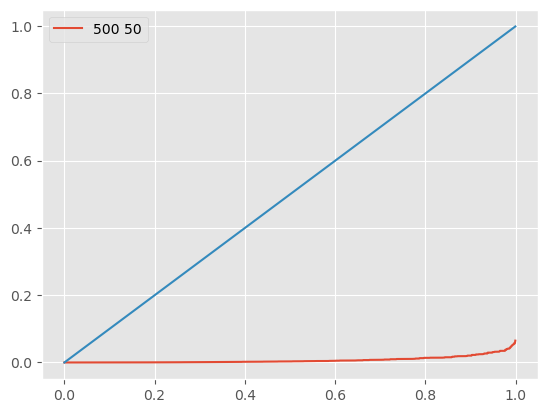

In [71]:
#b)
N = [50, 100, 500]
M = [2, 20, 50]

for n in N:
    for m in M:
        p = []
        for i in range(1000):
            y = sc.stats.binom.rvs(m, 0.5, size=n)
            x = 2*(y - 0.5*m)/(m**0.5)   
            p.append(sc.stats.kstest(x, 'norm')[1])

        p.sort()
        x = np.arange(0, 1, 0.001)
        plt.plot(x, p, label=str(n)+' '+str(m))
        plt.plot(x, x)
        plt.legend(loc='best')
        plt.show()


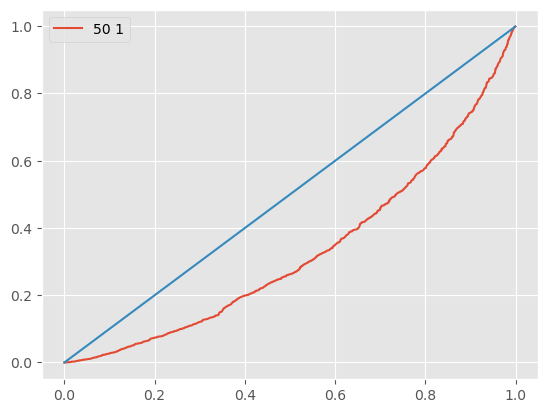

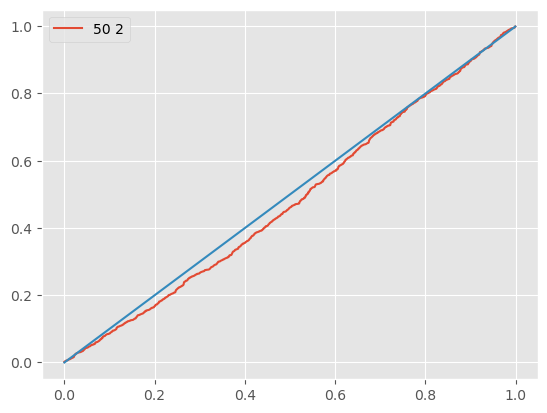

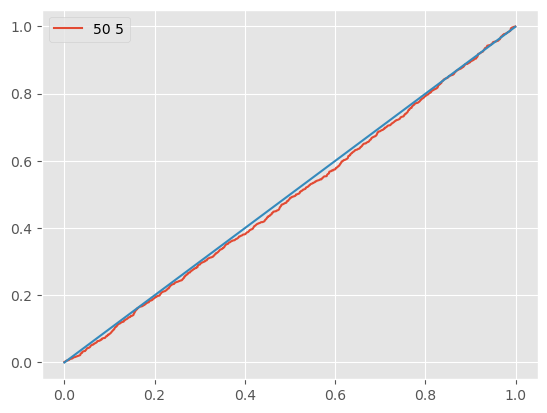

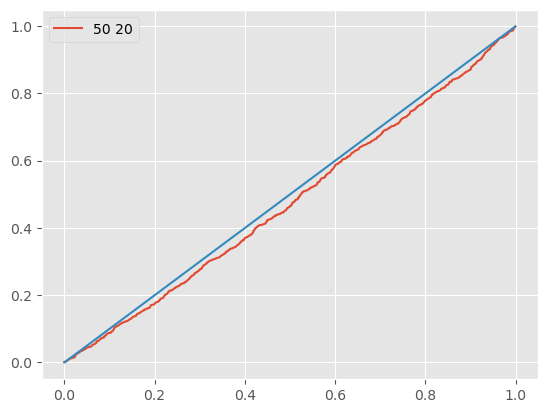

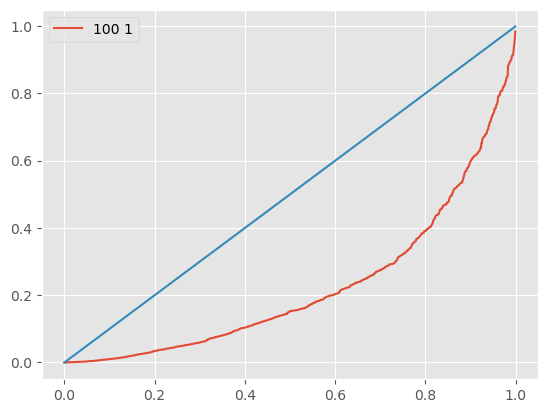

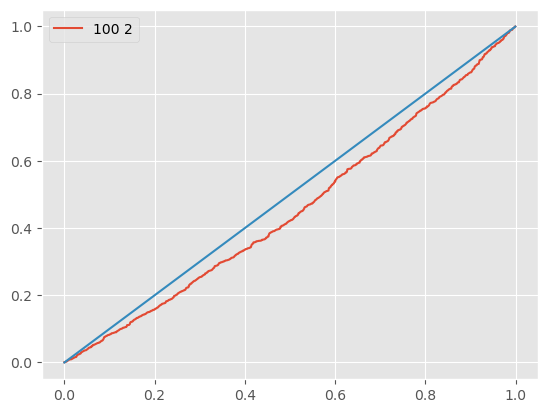

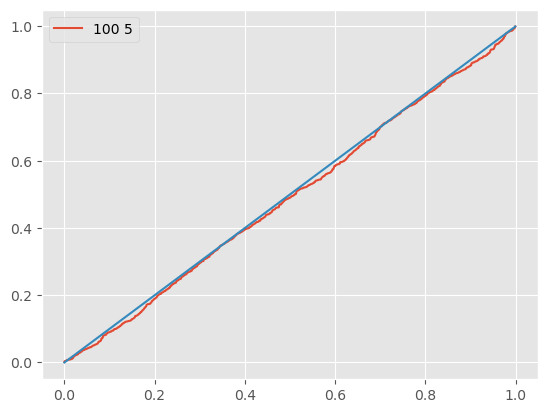

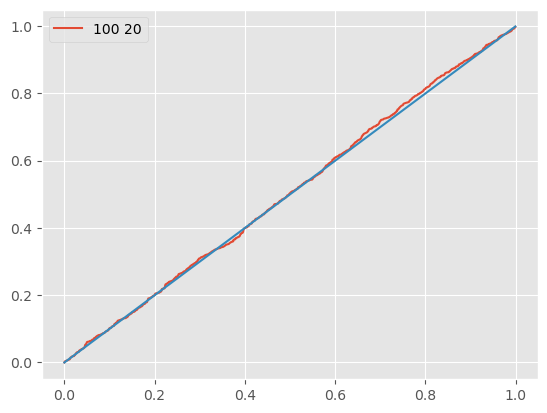

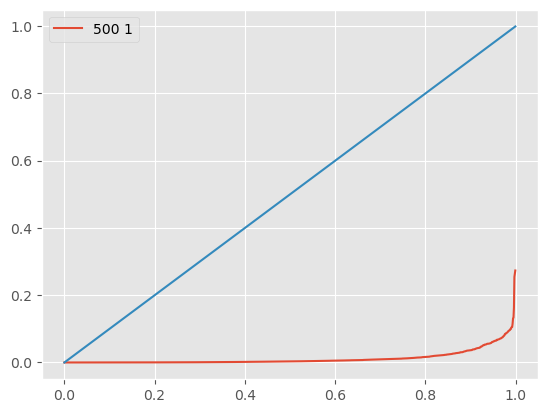

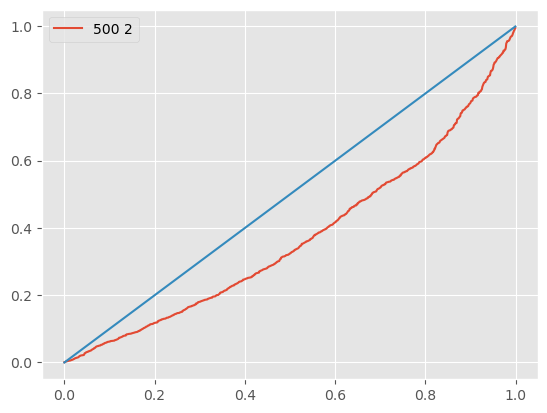

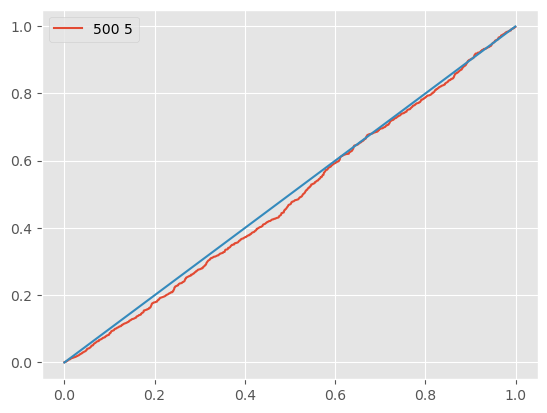

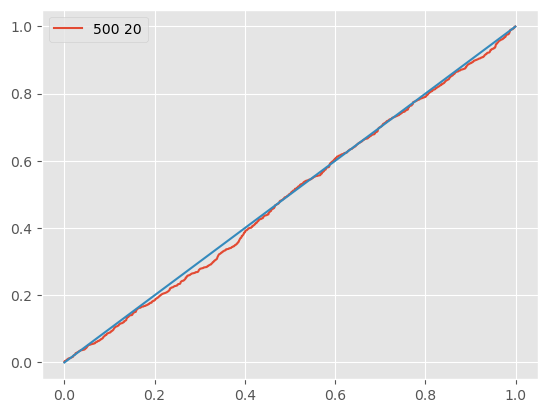

In [7]:
#c) 
N = [50, 100, 500]
M = [1, 2, 5, 20]

for n in N:
    for m in M:
        p = []
        for i in range(1000):
            y = [np.sum(sc.stats.uniform.rvs(0, 1, size=m)) for j in range(n)]
            y = np.array(y)
            x = (y - m/2)/(m/12)**0.5
            p.append(sc.stats.kstest(x, 'norm')[1])
        p.sort()
        x = np.arange(0, 1, 0.001)
        plt.plot(x, p, label=str(n)+' '+str(m))
        plt.plot(x, x)
        plt.legend(loc='best')
        plt.show()

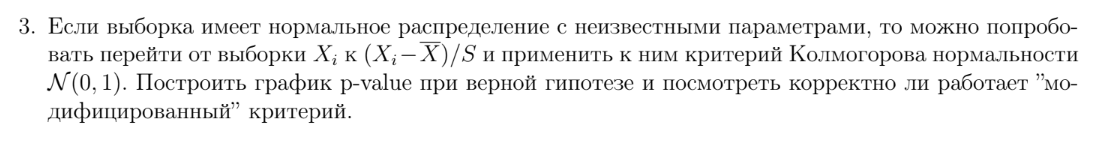

Введите ожидание:  1
Стандратное отклонение:  1
Размер выборки:  1000


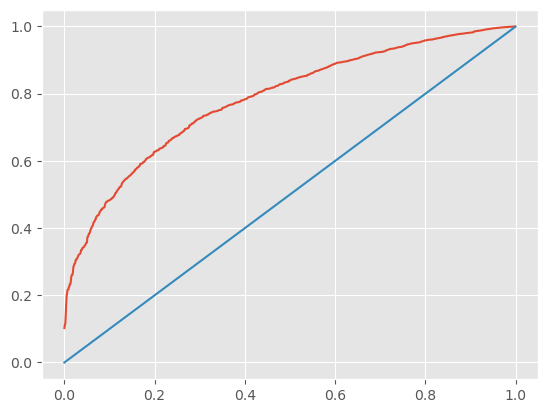

In [24]:
m = float(input("Введите ожидание: "))
s = float(input("Стандратное отклонение: "))
n = int(input("Размер выборки: "))

p = []
for i in range(1000):
    sample = sc.stats.norm.rvs(m, s, size=n)
    y = (sample - np.mean(sample))/(np.var(sample)**0.5)
    p.append(sc.stats.kstest(y, 'norm')[1])
    
x = np.arange(0, 1, 0.001)
plt.plot(x, np.sort(p))
plt.plot(x, x)